In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
my_path = r'C:\Users\nkasb\Desktop\Data analyst programm\Task 6\Project Task_6'

In [4]:
df = pd.read_csv(os.path.join(my_path, '2. Data', 'Data prepared', 'df_merged.csv'))

In [5]:
df.head()

Unnamed: 0  Year      Country  Happiness rank  Happiness score  \
0           0  2015  Switzerland             1.0            7.587   
1           1  2015      Iceland             2.0            7.561   
2           2  2015      Denmark             3.0            7.527   
3           3  2015       Norway             4.0            7.522   
4           4  2015       Canada             5.0            7.427   

   GDP per capita  Social support  Healthy life expectancy  Freedom  \
0         1.39651         1.34951                  0.94143  0.66557   
1         1.30232         1.40223                  0.94784  0.62877   
2         1.32548         1.36058                  0.87464  0.64938   
3         1.45900         1.33095                  0.88521  0.66973   
4         1.32629         1.32261                  0.90563  0.63297   

   Perception of corruption  Generosity  
0                   0.41978     0.29678  
1                   0.14145     0.43630  
2                   0.48357     0.34139  
3                   0.36503     0.34699  
4                   0.32957     0.45811

In [6]:
df.shape

(782, 11)

In [7]:
dups = df[df.duplicated()]

In [8]:
dups

Empty DataFrame
Columns: [Unnamed: 0, Year, Country, Happiness rank, Happiness score, GDP per capita, Social support, Healthy life expectancy, Freedom, Perception of corruption, Generosity]
Index: []

In [9]:
df.isnull().sum()

Unnamed: 0                  0
Year                        0
Country                     0
Happiness rank              3
Happiness score             0
GDP per capita              0
Social support              0
Healthy life expectancy     0
Freedom                     0
Perception of corruption    1
Generosity                  0
dtype: int64

In [10]:
df['Perception of corruption'].fillna(0.312, inplace = True)

In [11]:
df['Happiness rank'].fillna(152, inplace = True)

In [12]:
df.isnull().sum()

Unnamed: 0                  0
Year                        0
Country                     0
Happiness rank              0
Happiness score             0
GDP per capita              0
Social support              0
Healthy life expectancy     0
Freedom                     0
Perception of corruption    0
Generosity                  0
dtype: int64

In [13]:
df1 = df.drop(columns = ['Unnamed: 0', 'Country'])

In [14]:
df1.head()

Year  Happiness rank  Happiness score  GDP per capita  Social support  \
0  2015             1.0            7.587         1.39651         1.34951   
1  2015             2.0            7.561         1.30232         1.40223   
2  2015             3.0            7.527         1.32548         1.36058   
3  2015             4.0            7.522         1.45900         1.33095   
4  2015             5.0            7.427         1.32629         1.32261   

   Healthy life expectancy  Freedom  Perception of corruption  Generosity  
0                  0.94143  0.66557                   0.41978     0.29678  
1                  0.94784  0.62877                   0.14145     0.43630  
2                  0.87464  0.64938                   0.48357     0.34139  
3                  0.88521  0.66973                   0.36503     0.34699  
4                  0.90563  0.63297                   0.32957     0.45811

In [15]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [16]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

C:\Users\nkasb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-1594812.3615389976,
 -399538.50196647254,
 -178319.1877683971,
 -100935.84725497515,
 -65302.80526903865,
 -45783.49618623262,
 -34129.39691058938,
 -26543.897033940317,
 -21273.428554212067]

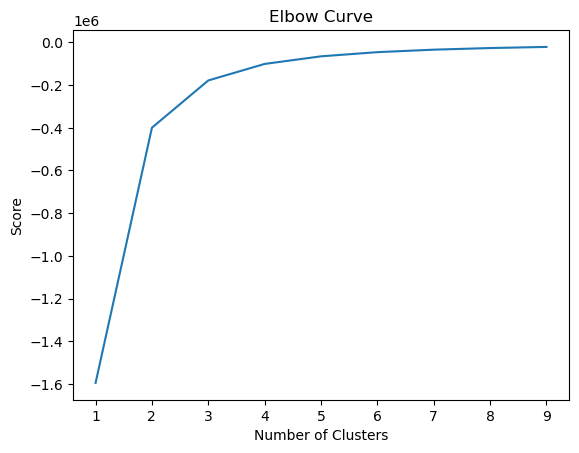

In [17]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

according to the elbow graph an optimal number of cluster would be 2 oder 3. We choose to use 3 cluster to avoid dividing the country into two without an intermediary zone.

In [18]:
kmeans = KMeans(init="random",
   ...:     n_clusters=3,
   ...:     n_init=10,
   ...:     max_iter=300,
   ...:     random_state=42)

In [19]:
kmeans.fit(df1)

KMeans(init='random', n_clusters=3, random_state=42)

In [20]:
df1['clusters'] = kmeans.fit_predict(df1)

In [21]:
df1.head()

Year  Happiness rank  Happiness score  GDP per capita  Social support  \
0  2015             1.0            7.587         1.39651         1.34951   
1  2015             2.0            7.561         1.30232         1.40223   
2  2015             3.0            7.527         1.32548         1.36058   
3  2015             4.0            7.522         1.45900         1.33095   
4  2015             5.0            7.427         1.32629         1.32261   

   Healthy life expectancy  Freedom  Perception of corruption  Generosity  \
0                  0.94143  0.66557                   0.41978     0.29678   
1                  0.94784  0.62877                   0.14145     0.43630   
2                  0.87464  0.64938                   0.48357     0.34139   
3                  0.88521  0.66973                   0.36503     0.34699   
4                  0.90563  0.63297                   0.32957     0.45811   

   clusters  
0         2  
1         2  
2         2  
3         2  
4         2

In [22]:
df1['clusters'].value_counts()

2    265
1    260
0    257
Name: clusters, dtype: int64

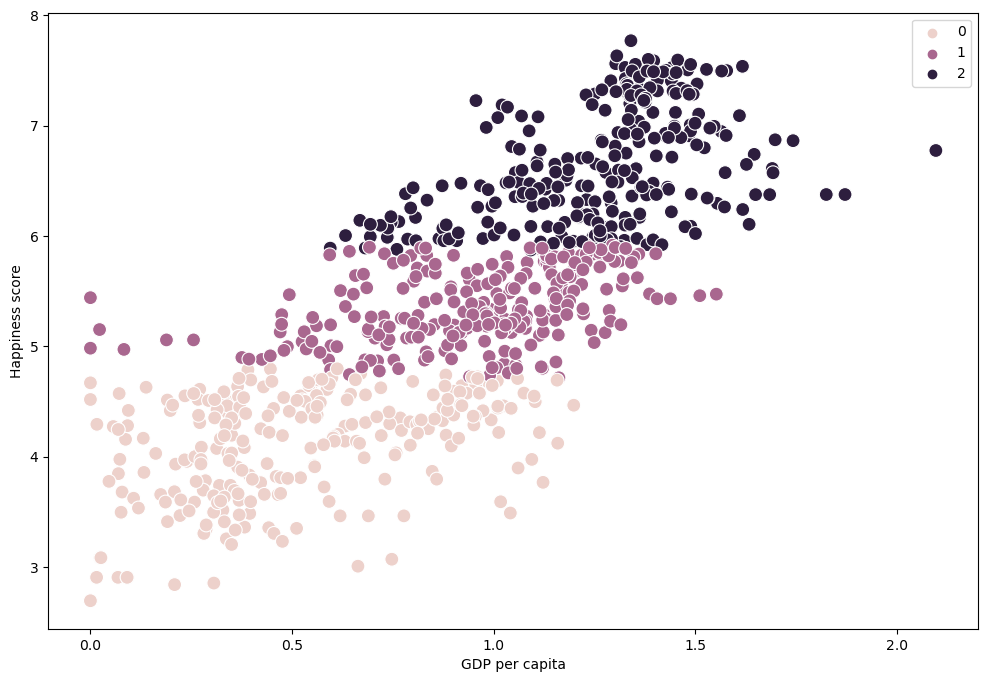

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['GDP per capita'], y=df1['Happiness score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Happiness score') 
plt.show()

Here the clustering divides the data into 3 distinct groups. This makes sens as according to the GDP the countries of the world are usually organised into 3 groups namely: the low-income, middle- income and high-income countries. Happiness score is linear correlated to the GDP per capita: it is normal that the grouping of the GDP matches the grouping of the happiness score

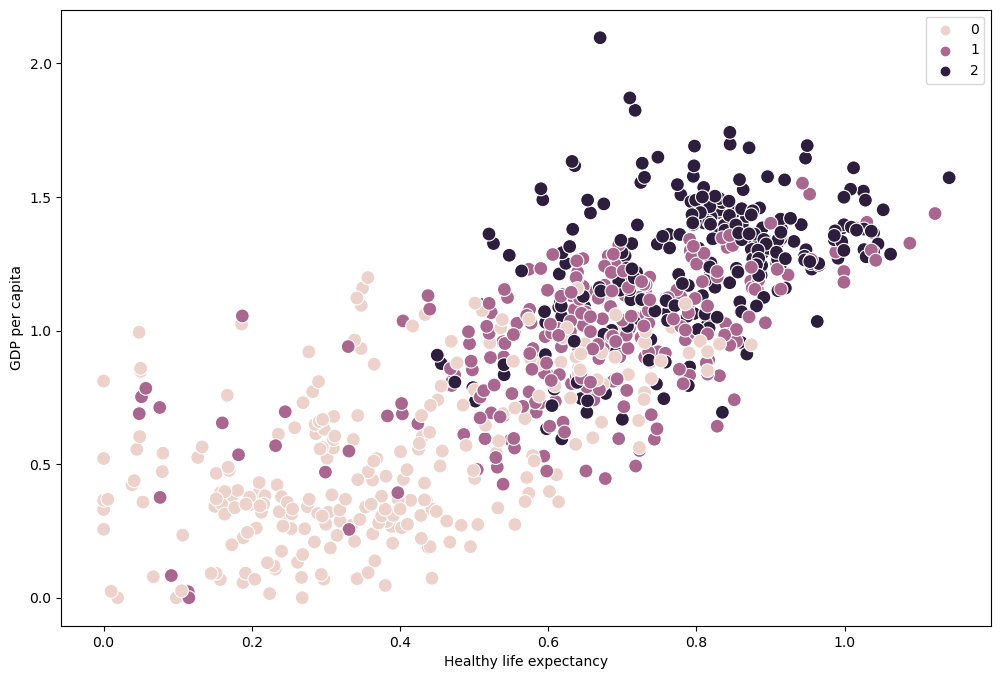

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Healthy life expectancy'], y=df1['GDP per capita'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Healthy life expectancy') 
plt.ylabel('GDP per capita') 
plt.show()

here the clustering into 3 groups produces not so clear bounderies. This mean the relation betwen healthy life expectancy and GDP per capita can be totally explained by the correlation. However a 2-group pattern can be observed.

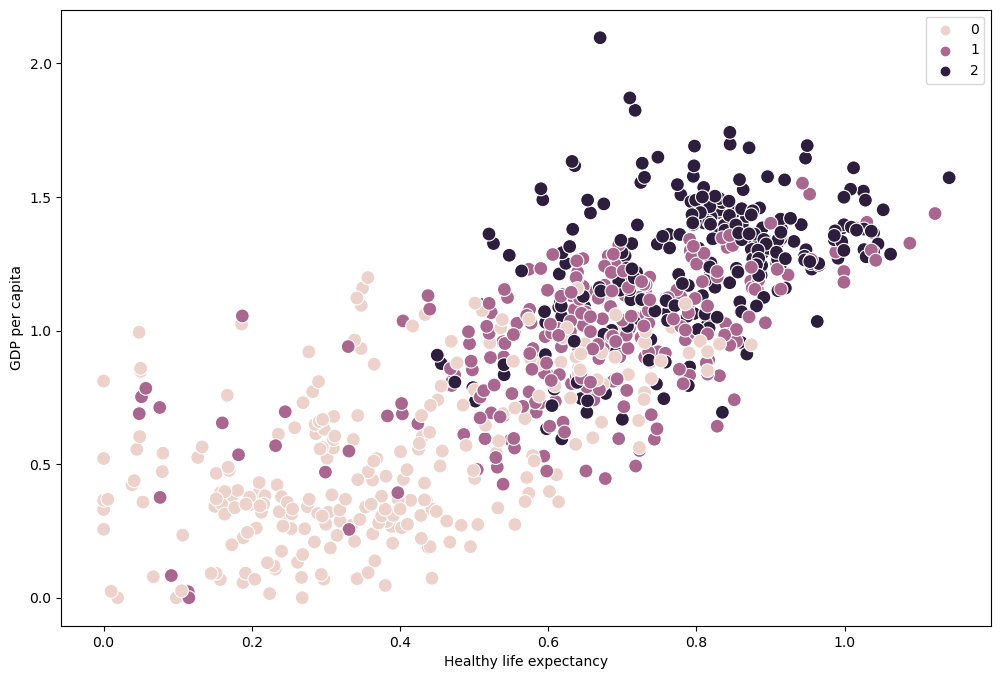

In [31]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Healthy life expectancy'], y=df1['GDP per capita'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Healthy life expectancy') 
plt.ylabel('GDP per capita') 
plt.show()

Here appears an obvious linear pattern between both variable. But the clustering of the data into 3 groups makes here almost no sens because it give no clear boundaries.

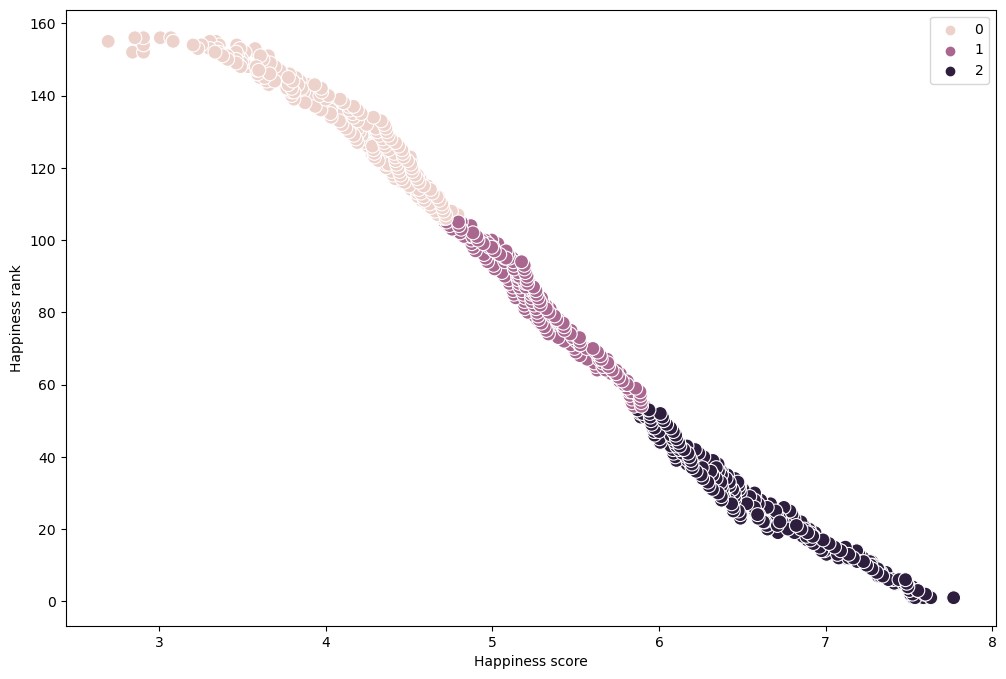

In [32]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Happiness score'], y=df1['Happiness rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Happiness score') 
plt.ylabel('Happiness rank') 
plt.show()

Here appears an obvious negative linear relation between Happiness score and Happiness rank. The clustering of the data into 3 groups defines clear boundaries. 

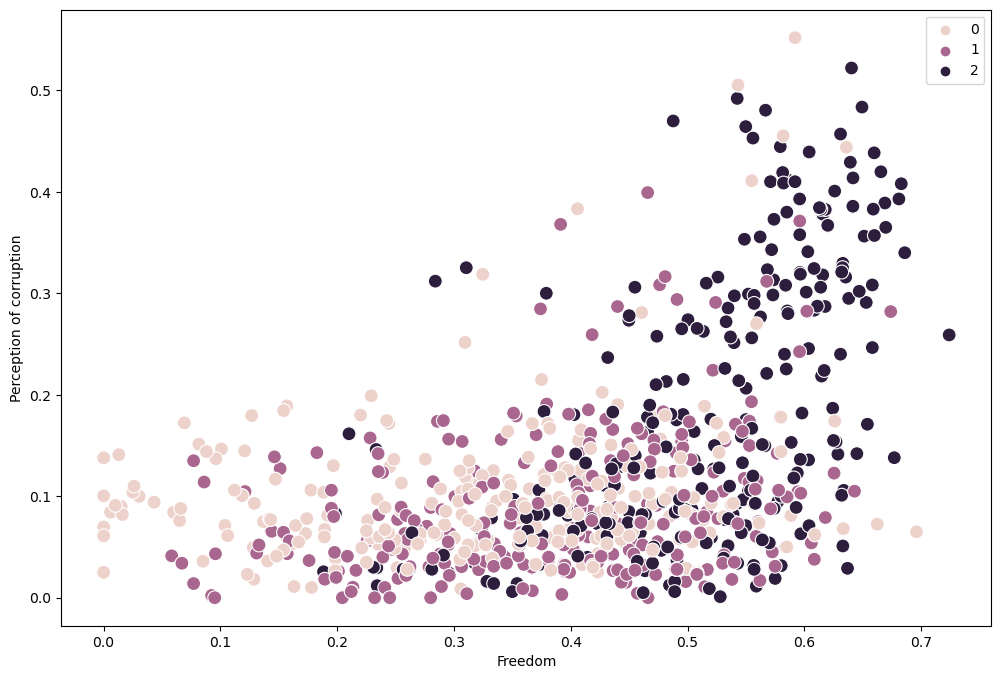

In [34]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Freedom'], y=df1['Perception of corruption'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Freedom') 
plt.ylabel('Perception of corruption') 
plt.show()

Here the relation between freedom and perception of corruption shows a non linear pattern. A clustering into 3 groups gives no clear bounderies but shed the light on the fact that the relation between both variables is non linear.

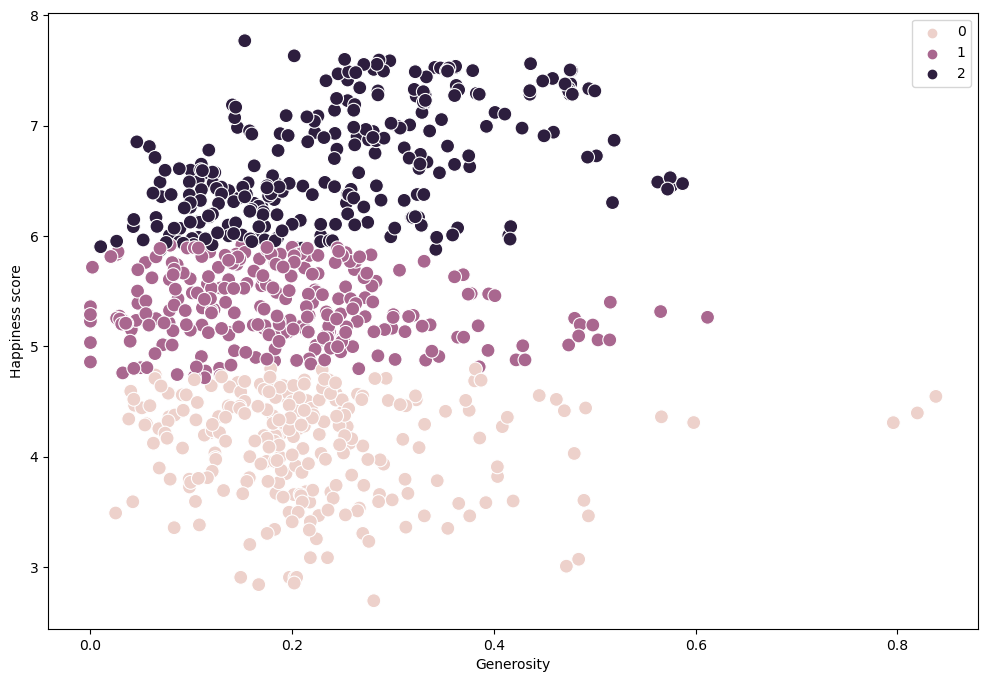

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Generosity'], y=df1['Happiness score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Generosity') 
plt.ylabel('Happiness score') 
plt.show()

The clustering of the data in 3 groups produces clear bounderies following the happiness score scale. 

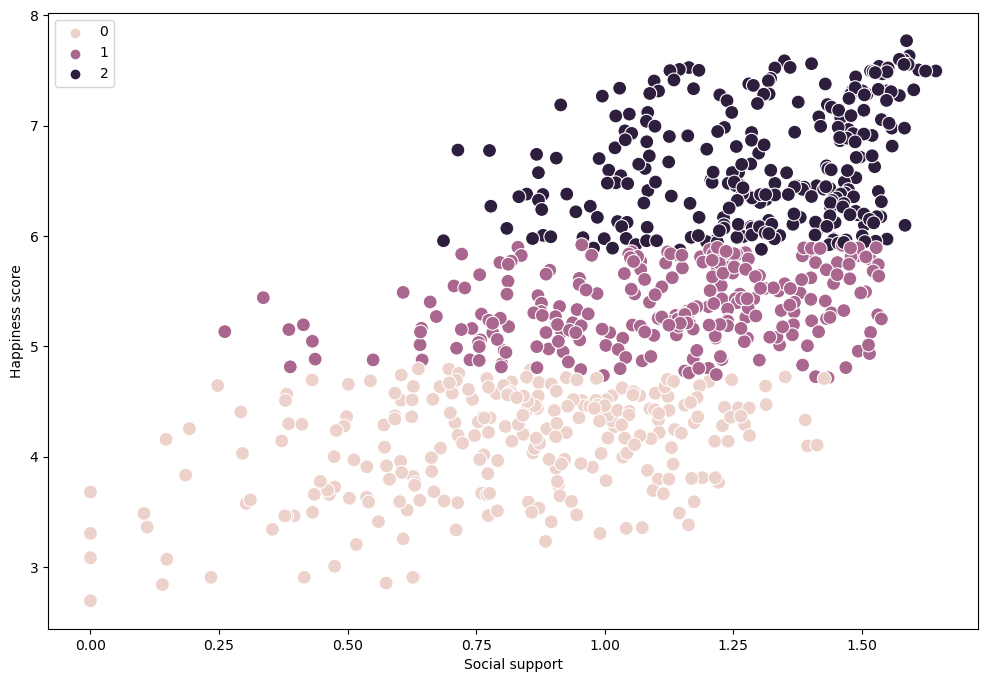

In [36]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Social support'], y=df1['Happiness score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Social support') 
plt.ylabel('Happiness score') 
plt.show()

Between happiness score and social support there is an apprently linear relation. The clustering produced clear bounderies and it actually makes sense because happiness score is highly correlated to the GDP and therefore fit the same clustering muster.

In [30]:
df.groupby('Year').agg({'Happiness score': ['mean', 'median'], 'Happiness rank': ['mean', 'median'], 
                        'GDP per capita': ['mean', 'median'], 'Social support': ['mean', 'median'], 
                       'Perception of corruption': ['mean', 'median'], 'Healthy life expectancy': ['mean', 'median'],
                       'Generosity': ['mean', 'median'], 'Freedom': ['mean', 'median']})

Happiness score         Happiness rank        GDP per capita            \
                mean  median           mean median           mean    median   
Year                                                                          
2015        5.375734  5.2325      79.430380   79.5       0.846137  0.910245   
2016        5.382185  5.3140      78.968153   79.0       0.953880  1.027800   
2017        5.354019  5.2790      78.000000   78.0       0.984718  1.064578   
2018        5.375917  5.3780      78.500000   78.5       0.891449  0.949500   
2019        5.407096  5.3795      78.500000   78.5       0.905147  0.960000   

     Social support           Perception of corruption            \
               mean    median                     mean    median   
Year                                                               
2015       0.991046  1.029510                 0.143422  0.107220   
2016       0.793621  0.841420                 0.137624  0.105470   
2017       1.188898  1.253918                 0.123120  0.089848   
2018       1.213237  1.255000                 0.113282  0.082000   
2019       1.208814  1.271500                 0.110603  0.085500   

     Healthy life expectancy           Generosity             Freedom  \
                        mean    median       mean    median      mean   
Year                                                                    
2015                0.630259  0.696705   0.237296  0.216130  0.428615   
2016                0.557619  0.596590   0.242635  0.222450  0.370994   
2017                0.551341  0.606042   0.246883  0.231538  0.408786   
2018                0.597346  0.644000   0.181006  0.174000  0.454506   
2019                0.725244  0.789000   0.184846  0.177500  0.392571   

                
        median  
Year            
2015  0.435515  
2016  0.397470  
2017  0.437454  
2018  0.487000  
2019  0.417000

These results indicate that the variable used to compute the happiness score contribute litlle or not at all to the happiness rank. For further analytics it could be usefull to look for new factors to that would contribute to the happiness rank and predict accurately the people happiness in all countries.